In [1]:
import random
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')

In [2]:
url = 'https://hilpisch.com/aiif_eikon_eod_data.csv'

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [4]:
symbol = 'EUR='

In [5]:
raw['bull'] = np.log(raw[symbol] / raw[symbol].shift(1))

In [6]:
data = pd.DataFrame(raw['bull']).loc['2015-01-01':]

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2015-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bull    1305 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [10]:
np.random.seed(100)

In [12]:
data['random'] = np.random.choice([-1, 1], len(data)) * data['bull']
data

,bull,random
Date,,
2015-01-01,0.000413,-0.000413
2015-01-02,-0.008464,0.008464
2015-01-05,-0.005767,-0.005767
2015-01-06,-0.003611,-0.003611
2015-01-07,-0.004299,-0.004299
...,...,...
2019-12-26,0.000541,0.000541
2019-12-27,0.007094,-0.007094
2019-12-30,0.001967,-0.001967


In [14]:
data['bear'] = -data['bull']
data

,bull,random,bear
Date,,,
2015-01-01,0.000413,-0.000413,-0.000413
2015-01-02,-0.008464,0.008464,0.008464
2015-01-05,-0.005767,-0.005767,0.005767
2015-01-06,-0.003611,-0.003611,0.003611
2015-01-07,-0.004299,-0.004299,0.004299
...,...,...,...
2019-12-26,0.000541,0.000541,-0.000541
2019-12-27,0.007094,-0.007094,-0.007094
2019-12-30,0.001967,-0.001967,-0.001967


In [16]:
def top(t):
    top = pd.DataFrame(data['bull'])
    top.columns = ['top']
    top = top.sort_values('top')
    n = int(len(data) * t)
    top['top'].iloc[:n] = abs(top['top'].iloc[:n])
    top['top'].iloc[n:] = abs(top['top'].iloc[n:])
    top['top'].iloc[n:-n] = np.random.choice([-1, 1],
                                             len(top['top'].iloc[n:-n])) * top['top'].iloc[n:-n]
    data[f'{int(t * 100)}_top'] = top.sort_index()

In [17]:
for t in [0.1, 0.15]:
    top(t)

In [19]:
def afi(ratio):
    correct = np.random.binomial(1, ratio, len(data))
    random = np.random.choice([-1, 1], len(data))
    strat = np.where(correct, abs(data['bull']), random * data['bull'])
    data[f'{int(ratio * 100)}_afi'] = strat

In [21]:
for ratio in [0.51, 0.6, 0.75, 0.9]:
    afi(ratio)

<Axes: xlabel='Date'>

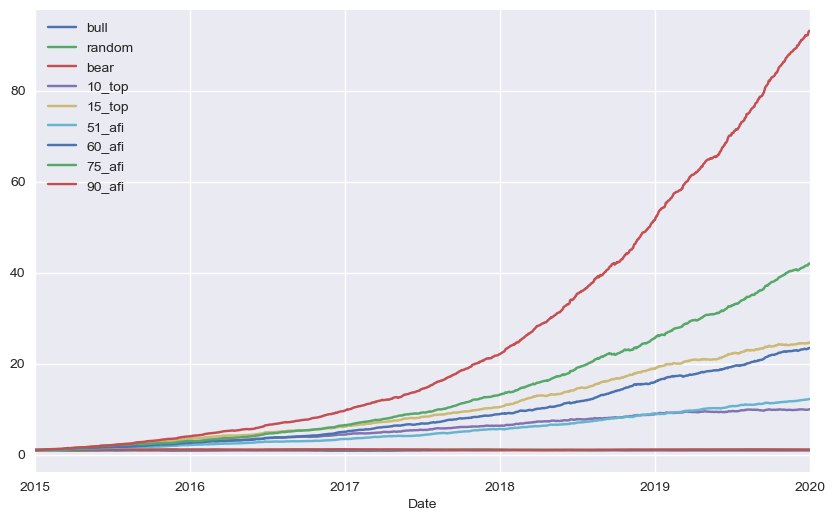

In [25]:
data.cumsum().apply(np.exp).plot(figsize=(10, 6))